![BTS](img/Logo-BTS.jpg)

# Session 17: Graphs

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-12-05)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/17-Graphs.ipynb)

## Creating graphs in NetworkX

In NetworkX, nodes can be any hashable object: a text string, an image, an XML object, another Graph, a customized node object...

In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
g = nx.Graph()

In [63]:
g.add_node(1)

In [64]:
g.add_nodes_from([2, 3])

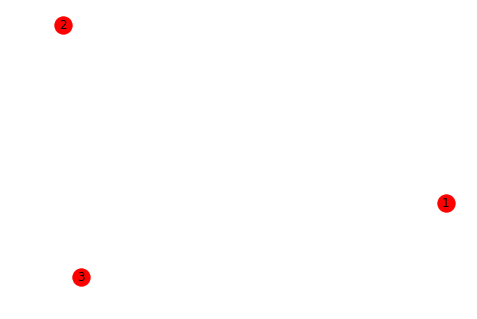

In [65]:
nx.draw(g, with_labels=True)

In [66]:
nx.is_connected(g)

False

In [67]:
g2 = g.copy()

In [68]:
g2.add_edges_from([
    (1, 2),
    (1, 3),
])

In [59]:
#g2.add_edge(1, 2)

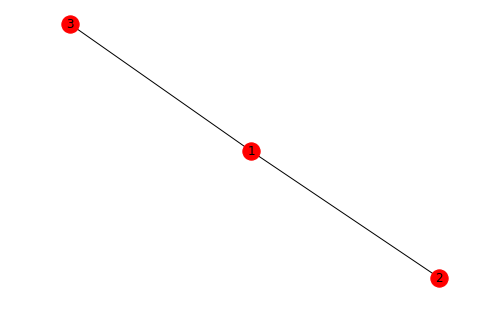

In [69]:
nx.draw(g2, with_labels=True)

In [70]:
nx.is_connected(g)

False

In [71]:
nx.is_connected(g2)

True

We have a special class, `DiGraph`, that helps create directed graphs and has extra properties.

## Basic properties

In [75]:
# How to check if two points are directly connected?

In [81]:
g.number_of_nodes()

3

In [77]:
g.order()

3

In [83]:
g2.number_of_nodes()

3

In [78]:
g2.order()

3

In [84]:
g.number_of_edges()

0

In [79]:
g.size()

0

In [85]:
g2.number_of_edges()

2

In [80]:
g2.size()

2

In [89]:
g2.edges()

EdgeView([(1, 2), (1, 3)])

In [87]:
g2.edges(3)

EdgeDataView([(3, 1)])

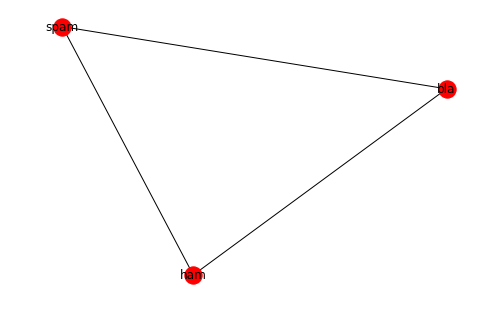

In [113]:
g3 = nx.Graph(name="foods", my_custom_property=42)

g3.add_nodes_from(["spam", "ham"])
g3.add_edge("spam", "ham", weight=0.3)

g3.add_node("bla")
g3.add_edges_from([('spam', 'bla', {'weight': 0.1}), ('bla', 'ham', {'weight': 0.2})])

nx.draw(g3, with_labels=True)

In [114]:
nx.shortest_path(g3, "spam", "ham", weight="weight")

['spam', 'ham']

In [115]:
nx.shortest_path_length(g3, "spam", "ham", weight='weight')

0.3

In [97]:
g3.edges.data()

EdgeDataView([('spam', 'ham', {'weight': 1.5})])

In [94]:
g3.graph

{'name': 'foods', 'my_custom_property': 42}

## Graph generators

In NetworkX there are different graph generators we can use:

* Classic small graphs
* Constructive graph generators
* Stochastic graph generators

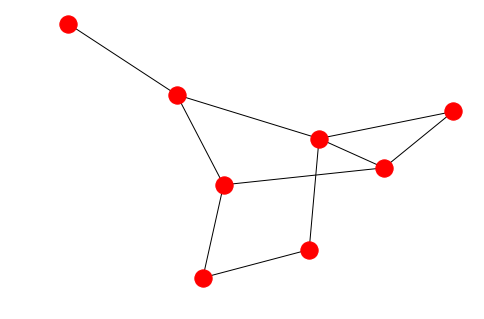

In [29]:
nx.draw(nx.sedgewick_maze_graph())

In [40]:
g = nx.complete_bipartite_graph(3, 5)

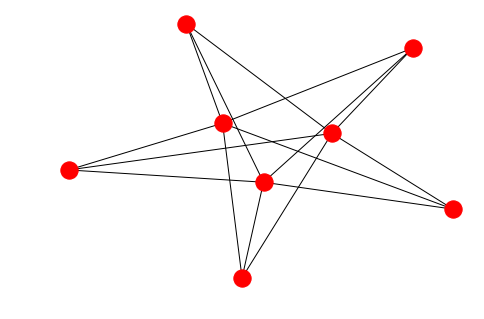

In [41]:
nx.draw(g)

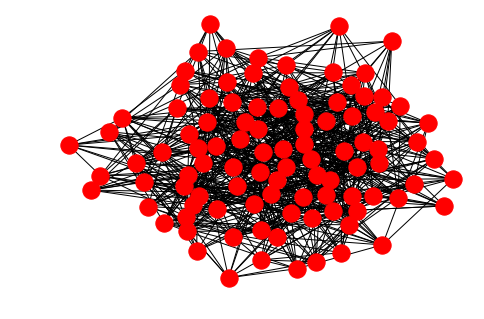

In [77]:
nx.draw(nx.erdos_renyi_graph(100, 0.15))

## Analysis

## Advanced drawing

In [63]:
g = nx.complete_bipartite_graph(3, 5)

In [64]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [70]:
nx.__version__

'2.2'

In [67]:
layout = nx.bipartite_layout(g, list(range(3)))

In [68]:
layout

{0: array([-1. , -0.6]),
 1: array([-1.,  0.]),
 2: array([-1. ,  0.6]),
 3: array([ 0.6, -0.6]),
 4: array([ 0.6, -0.3]),
 5: array([0.6, 0. ]),
 6: array([0.6, 0.3]),
 7: array([0.6, 0.6])}

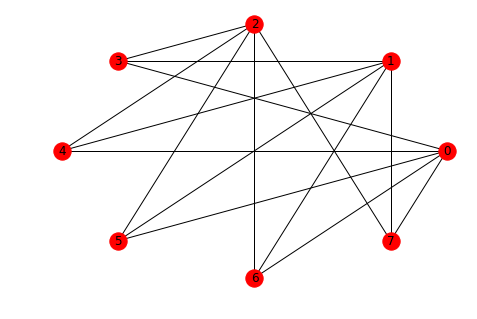

In [73]:
nx.draw(g, nx.circular_layout(g), with_labels=True)

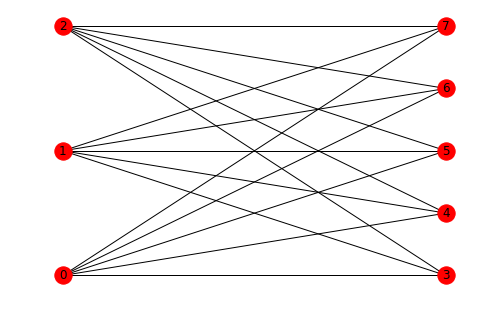

In [69]:
nx.draw(g, layout, with_labels=True)

## Exercise 1: The Königsberg graph

1. Create a (undirected) graph representing the Königsberg bridges
2. Look in the [`Algorithms` documentation](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) for a function to check whether there is a way to traverse each bridge only once _(Hint: look for the name of the matematician that studied the problem!)_
3. Is there a way to add an 8th bridge and make the graph Eulerian? Reason why, and print the Eulerian circuit
4. Is there a way to add a 9th bridge so the Eulerian circuit cannot start in the Northern part of the city? Add it, and confirm your suspicion printing the resulting Eulerian circuit 

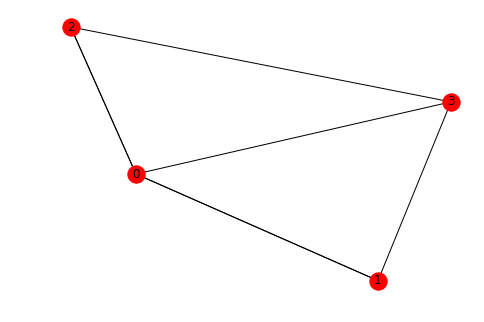

In [4]:
kon = nx.MultiGraph()

kon.add_nodes_from(range(4))
kon.add_edges_from([
    (0, 1),
    (0, 1),
    (0, 2),
    (0, 2),
    (0, 3),
    (1, 3),
    (2, 3),
])

nx.draw(kon, with_labels=True)

In [132]:
nx.is_eulerian(kon)

False

In [133]:
kon_alt = kon.copy()

In [135]:
kon_alt.add_edge(1, 3)

1

In [136]:
nx.is_eulerian(kon_alt)

False

In [137]:
kon_alt.add_edge(0, 2)

2

In [138]:
nx.is_eulerian(kon_alt)

True

In [130]:
kon.edges()

MultiEdgeDataView([(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (1, 3), (2, 3)])

In [20]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(kon)
#nx.draw(kon, pos=pos)
write_dot(kon, 'kon.dot')


In [21]:
from grave import plot_network

In [23]:
def color_dominators(node_attrs):
    return {'color': 'red'}

In [ ]:
!conda install pygraphviz

In [25]:
kon.nodes

NodeView((0, 1, 2, 3))

In [15]:
G = nx.complete_graph(5)   # start with K5 in networkx
A = nx.nx_agraph.to_agraph(G)        # convert to a graphviz graph
X1 = nx.nx_agraph.from_agraph(A)     # convert back to networkx (but as Graph)
X2 = nx.Graph(A)          # fancy way to do conversion
G1 = nx.Graph(X1)          # now make it a Graph

A.write('k5.dot')     # write to dot file
X3 = nx.nx_agraph.read_dot('k5.dot')  # read from dotfile

In [17]:
from dask.dot import dot_graph

In [18]:
dot_graph??

In [14]:
ag = nx.nx_agraph.to_agraph(kon)
ag.layout()
ag.draw()

b'graph {\n\tgraph [bb="-63.769,-73.693,78.094,54.463"];\n\tnode [label="\\N"];\n\t0\t [height=0.5,\n\t\tpos="-36.769,-4.1927",\n\t\twidth=0.75];\n\t1\t [height=0.5,\n\t\tpos="51.094,23.422",\n\t\twidth=0.75];\n\t0 -- 1 [key=0,\n\tpos="-16.824,8.277 -4.7301,13.146 10.848,18.132 24.039,21.389"];\n0 -- 1 [key=1,\npos="-9.5009,-2.1067 3.7251,1.1714 19.309,6.1701 31.368,11.041"];\n2 [height=0.5,\npos="-7.6724,-55.693",\nwidth=0.75];\n0 -- 2 [key=0,\npos="-20.958,-19.022 -17.16,-24.835 -13.478,-31.538 -10.759,-37.626"];\n0 -- 2 [key=1,\npos="-33.739,-22.132 -31.008,-28.27 -27.288,-35.045 -23.454,-40.91"];\n3 [height=0.5,\npos="-6.6519,36.463",\nwidth=0.75];\n0 -- 3 [key=0,\npos="-24.519,12.344 -22.63,14.894 -20.68,17.526 -18.793,20.073"];\n1 -- 3 [key=0,\npos="25.261,29.256 23.219,29.717 21.156,30.183 19.115,30.644"];\n2 -- 3 [key=0,\npos="-7.4708,-37.486 -7.2919,-21.33 -7.0319,2.1492 -6.8531,18.294"];\n}\n'

In [9]:
from pygraphviz import graphviz

In [19]:
graphviz??

## Exercise 2: Flights data

1. Load `airports.dat` and `routes.dat` from the OpenFlights database https://openflights.org/data.html
2. Create a dataframe `routes_us` with the routes _only_ from the airports in the United States
3. Draw the routes using the number of total flights to change the size of the circles
4. Which are the top 10 busies airports?

In [78]:
import pandas as pd

In [ ]:
for line in blob.splitlines():
    print('"{}",'.format(line.split("	")[0].strip()))

In [106]:
print("[")
for line in """
Airline 	2-letter (IATA) or 3-letter (ICAO) code of the airline.
Airline ID 	Unique OpenFlights identifier for airline (see Airline).
Source airport 	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
Source airport ID 	Unique OpenFlights identifier for source airport (see Airport)
Destination airport 	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
Destination airport ID 	Unique OpenFlights identifier for destination airport (see Airport)
Codeshare 	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
Stops 	Number of stops on this flight ("0" for direct)
Equipment 	3-letter codes for plane type(s) generally used on this flight, separated by spaces
""".splitlines():
    print('      "{}",'.format(line.split("	")[0].strip()))
print("]")

[
      "",
      "Airline",
      "Airline ID",
      "Source airport",
      "Source airport ID",
      "Destination airport",
      "Destination airport ID",
      "Codeshare",
      "Stops",
      "Equipment",
]


In [115]:
airports = pd.read_csv(
    "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
    header=None,
    index_col=0,
    names=[
        "Airport ID",
        "Name",
        "City",
        "Country",
        "IATA",
        "ICAO",
        "Latitude",
        "Longitude",
        "Altitude",
        "Timezone",
        "DST",
        "Tz database time zone",
        "Type",
        "Source",
    ],
)
airports.index = airports.index.astype(str)
airports.head()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
Airport ID,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [118]:
routes = pd.read_csv(
    "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
    header=None,
    names=[
        "Airline",
        "Airline ID",
        "Source airport",
        "Source airport ID",
        "Destination airport",
        "Destination airport ID",
        "Codeshare",
        "Stops",
        "Equipment",
    ],
)
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [140]:
routes_with_countries = routes.join(
    airports["Country"],
    on="Source airport ID"
).join(
    airports["Country"],
    on="Destination airport ID",
    rsuffix="_dest"
)
routes_with_countries.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Country,Country_dest
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,Russia,Russia
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,Russia,Russia
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,Russia,Russia
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,Russia,Russia
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,Russia,Russia


In [141]:
routes_with_countries = routes.join(
    airports[["Country"]].rename({"Country": "Source Country"}, axis=1),
    on="Source airport ID"
).join(
    airports[["Country"]].rename({"Country": "Destination Country"}, axis=1),
    on="Destination airport ID"
)
routes_with_countries.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source Country,Destination Country
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,Russia,Russia
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,Russia,Russia
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,Russia,Russia
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,Russia,Russia
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,Russia,Russia


In [142]:
routes_us = routes_with_countries[
    (routes_with_countries["Source Country"] == "United States") &
    (routes_with_countries["Destination Country"] == "United States")
]
routes_us.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source Country,Destination Country
172,2O,146,ADQ,3531,KLN,7162,NaN,0,BNI,United States,United States
177,2O,146,KLN,7162,KYK,7161,NaN,0,BNI,United States,United States
260,3E,10739,BRL,5726,ORD,3830,NaN,0,CNC,United States,United States
261,3E,10739,BRL,5726,STL,3678,NaN,0,CNC,United States,United States
262,3E,10739,DEC,4042,ORD,3830,NaN,0,CNC,United States,United States


In [146]:
us_airports = airports[airports["Country"] == "United States"]

In [149]:
routes_us = routes[
    routes["Source airport ID"].isin(us_airports.index) &
    routes["Destination airport ID"].isin(us_airports.index)
]
routes_us.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
172,2O,146,ADQ,3531,KLN,7162,NaN,0,BNI
177,2O,146,KLN,7162,KYK,7161,NaN,0,BNI
260,3E,10739,BRL,5726,ORD,3830,NaN,0,CNC
261,3E,10739,BRL,5726,STL,3678,NaN,0,CNC
262,3E,10739,DEC,4042,ORD,3830,NaN,0,CNC


## Exercise 3: Cambridge places

1. Create a **directed** graph from the edge list available in `data/cambridge_net.txt`
2. Compute what's the _average degree_ (number of nodes per edge)
3. Represent the in-degree and the out-degree of the nodes like this:

![Degrees](img/degrees.png)

And 4. Correct the plot to use logarithmic scale in both axis